In [1]:
import random

possible_values = []

# Generate random points until you have enough that satisfy the criteria
while len(possible_values) < 10000:  
    p1 = random.randint(0, 1000)
    p2 = random.randint(0, 1000 - p1)
    p3 = random.randint(0, 1000 - p1 - p2)
    p4 = 1000 - p1 - p2 - p3
    
    possible_values.append((p1 / 1000, p2 / 1000, p3 / 1000, p4 / 1000))

print(possible_values)


[(0.517, 0.439, 0.006, 0.038), (0.741, 0.167, 0.034, 0.058), (0.165, 0.48, 0.163, 0.192), (0.884, 0.056, 0.014, 0.046), (0.584, 0.266, 0.136, 0.014), (0.859, 0.023, 0.013, 0.105), (0.835, 0.023, 0.123, 0.019), (0.4, 0.242, 0.17, 0.188), (0.251, 0.673, 0.029, 0.047), (0.769, 0.213, 0.0, 0.018), (0.494, 0.453, 0.021, 0.032), (0.491, 0.34, 0.158, 0.011), (0.233, 0.463, 0.021, 0.283), (0.913, 0.033, 0.001, 0.053), (0.939, 0.057, 0.002, 0.002), (0.535, 0.301, 0.125, 0.039), (0.98, 0.007, 0.005, 0.008), (0.959, 0.023, 0.007, 0.011), (0.47, 0.274, 0.221, 0.035), (0.641, 0.29, 0.039, 0.03), (0.577, 0.114, 0.173, 0.136), (0.772, 0.1, 0.091, 0.037), (0.81, 0.166, 0.003, 0.021), (0.097, 0.137, 0.666, 0.1), (0.869, 0.082, 0.003, 0.046), (0.663, 0.194, 0.1, 0.043), (0.056, 0.841, 0.013, 0.09), (0.082, 0.26, 0.431, 0.227), (0.816, 0.117, 0.024, 0.043), (0.141, 0.415, 0.13, 0.314), (0.818, 0.11, 0.064, 0.008), (0.948, 0.034, 0.016, 0.002), (0.596, 0.107, 0.127, 0.17), (0.405, 0.308, 0.072, 0.215), (0

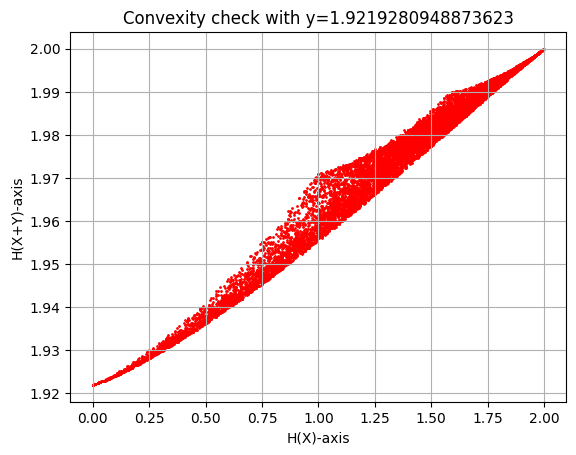

In [2]:
#for 1/3 case, fixed h(y) would be log3
#plot f against x
#spot graph
import matplotlib.pyplot as plt
import math
def h(p1, p2, p3, p4):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0 and p4 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
        
    if p4 <= epsilon:
        term4 = 0
    else:
        term4 = -p4 * math.log(p4, 2)
    
    x = term1 + term2 + term3 +term4
    return x

##############still have to work on how to achieve the minimum value, but this is good progress#########
def get_unique_min_values(x, y):
    # Combine x and y into a dictionary where x-values map to a list of corresponding y-values
    combined_values = {}
    for xi, yi in zip(x, y):
        if xi in combined_values:
            combined_values[xi].append(yi)
        else:
            combined_values[xi] = [yi]
    
    # Find the minimum y-value for each unique x-value
    sorted_keys = sorted(combined_values.keys())
    unique_x = []
    min_y_for_x = []
    for xi in sorted_keys:
        unique_x.append(xi)
        min_y_for_x.append(min(combined_values[xi]))
    
    return unique_x, min_y_for_x

################what is minimum? - minimum distribution 

xentro = []
fentro = []

#equation after convolution (fixed distribution of y)
q1 = 1/5
q2 = 1/5
q3 = 1/5
q4 = 1-q1-q2-q3
y = h(q1,q2,q3,q4)


for i in range(len(possible_values)):
    p1, p2, p3, p4 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution --> from here 
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 3)


    xentro.append(rounded_x)
    fentro.append(f)

unique_x, min_y_for_x = get_unique_min_values(xentro, fentro)


# Plotting the point
plt.scatter(xentro, fentro, color='red', s=1)  # Scatter plot for a single point
plt.title(f'Convexity check with y={y}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.grid(True)
plt.show()



In [3]:
p_values = []

# Generate values for p1, p2, p3 within 2 decimal places
for p1 in range(0, 5001):  # Adjust the range to cover values from 0 to 0.5 with 0.01 increment
    p_values.append(p1 / 10000)  # Divide by 100 to get the decimal representation

print(p_values)


[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126,

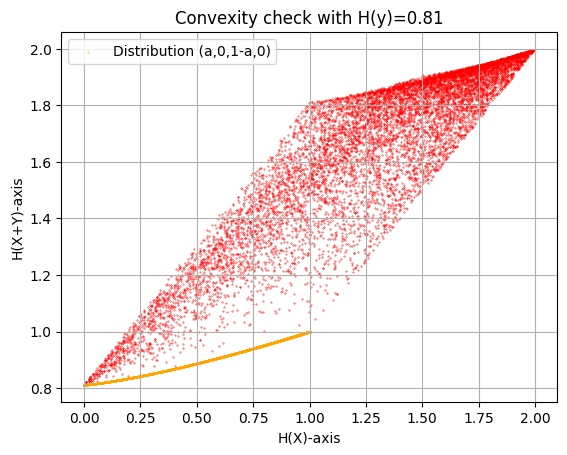

In [4]:
#for 1/3 case, fixed h(y) would be log3
#plot f against x
#spot graph
import matplotlib.pyplot as plt
import math
def h(p1, p2, p3, p4):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0 and p4 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
        
    if p4 <= epsilon:
        term4 = 0
    else:
        term4 = -p4 * math.log(p4, 2)
    
    x = term1 + term2 + term3 +term4
    return x

##############still have to work on how to achieve the minimum value, but this is good progress#########
def get_unique_min_values(x, y):
    # Combine x and y into a dictionary where x-values map to a list of corresponding y-values
    combined_values = {}
    for xi, yi in zip(x, y):
        if xi in combined_values:
            combined_values[xi].append(yi)
        else:
            combined_values[xi] = [yi]
    
    # Find the minimum y-value for each unique x-value
    sorted_keys = sorted(combined_values.keys())
    unique_x = []
    min_y_for_x = []
    for xi in sorted_keys:
        unique_x.append(xi)
        min_y_for_x.append(min(combined_values[xi]))
    
    return unique_x, min_y_for_x

################what is minimum? - minimum distribution 

xentro = []
fentro = []

#equation after convolution (fixed distribution of y)
q1 = 0.25
q2 = 0
q3 = 0.75
q4 = 1-q1-q2-q3
y = h(q1,q2,q3,q4)


for i in range(len(possible_values)):
    p1, p2, p3, p4 = possible_values[i]
    #monotone
    #if p1 > p2 and p2 > p3 and p3 > p4:

    #equation for h(x)
    x = h(p1,p2,p3,p4)

    #probability of convolution --> from here 
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 3)


    xentro.append(rounded_x)
    fentro.append(f)

unique_x, min_y_for_x = get_unique_min_values(xentro, fentro)

hxentro = []
hfentro = []


for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = p_values[i]
    p4 = 1 - p1 - p2 - p3
    
    if p4 > p1:
        
        #equation for h(x)
        x = h(p1,p2,p3,p4)

        #probability of convolution
        b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
        b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
        b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
        b4 = 1-b1-b2-b3

        #equation for  h(x+y)
        f = h(b1,b2,b3,b4)

        # Rounding x to 2 decimal places
        rounded_x = round(x, 5)


        hxentro.append(rounded_x)
        hfentro.append(f)

kktx = []
kkty = []
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = 0
    p3 = 1-p_values[i]
    p4 = 0
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx.append(rounded_x)
    kkty.append(f)

    
kktx2 = []
kkty2 = []
for i in range(len(p_values)):
    p1 = p_values[i]/2
    p2 = (1-p_values[i])/2
    p3 = p_values[i]/2
    p4 = (1-p_values[i])/2
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx2.append(rounded_x)
    kkty2.append(f)

kktx3 = []
kkty3 = []
for i in range(len(p_values)):
    p1 = 1/4
    p2 = 1/4
    p3 = p_values[i]*(1/2)
    p4 = (1-p_values[i])*(1/2)
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx3.append(rounded_x)
    kkty3.append(f)    
    
    
# Plotting the point
plt.scatter(xentro, fentro, color='red', s=0.1)  # Scatter plot for a single point
#plt.scatter(hxentro, hfentro, color='black', s=1, label = 'Distribution (a,a,a,1-3a)')  # Scatter plot for a single point
plt.scatter(kktx, kkty, color='orange', s=0.1, label = 'Distribution (a,0,1-a,0)')  # Scatter plot for a single point
#plt.scatter(kktx2, kkty2, color='blue', s=0.1, label = 'Distribution (a/2,(1-a)/2,a/2,(1-a)/2)')  # Scatter plot for a single point
#plt.scatter(kktx3, kkty3, color='black', s=0.1)  # Scatter plot for a single point
plt.title(f'Convexity check with H(y)={round(y,2)}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.grid(True)
plt.legend()
plt.show()



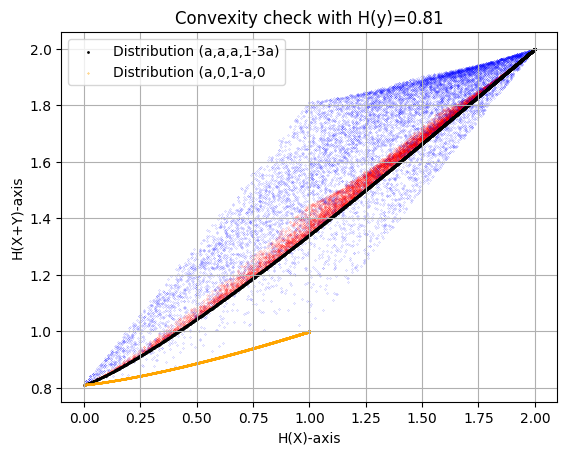

In [5]:
#for 1/3 case, fixed h(y) would be log3
#plot f against x
#spot graph
import matplotlib.pyplot as plt
import math
def h(p1, p2, p3, p4):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0 and p4 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
        
    if p4 <= epsilon:
        term4 = 0
    else:
        term4 = -p4 * math.log(p4, 2)
    
    x = term1 + term2 + term3 +term4
    return x

##############still have to work on how to achieve the minimum value, but this is good progress#########
def get_unique_min_values(x, y):
    # Combine x and y into a dictionary where x-values map to a list of corresponding y-values
    combined_values = {}
    for xi, yi in zip(x, y):
        if xi in combined_values:
            combined_values[xi].append(yi)
        else:
            combined_values[xi] = [yi]
    
    # Find the minimum y-value for each unique x-value
    sorted_keys = sorted(combined_values.keys())
    unique_x = []
    min_y_for_x = []
    for xi in sorted_keys:
        unique_x.append(xi)
        min_y_for_x.append(min(combined_values[xi]))
    
    return unique_x, min_y_for_x

################what is minimum? - minimum distribution 



#equation after convolution (fixed distribution of y)
q1 = 0.047
q2 = 0.047
q3 = 0.047
q4 = 1-q1-q2-q3
c = h(q1,q2,q3,q4)

xentroR = []
fentroR = []
for i in range(len(possible_values)):
    p1, p2, p3, p4 = possible_values[i]
    #monotone
    #if p1 > p2 and p2 > p3 and p3 > p4:

    #equation for h(x)
    x = h(p1,p2,p3,p4)

    #probability of convolution --> from here 
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 3)


    xentroR.append(rounded_x)
    fentroR.append(f)

#equation after convolution (fixed distribution of y)
q1B = 0.25
q2B = 0
q3B = 0.75
q4B = 1-q1B-q2B-q3B
y = h(q1B,q2B,q3B,q4B)

    
xentroB = []
fentroB = []
for i in range(len(possible_values)):
    p1, p2, p3, p4 = possible_values[i]
    #monotone
    #if p1 > p2 and p2 > p3 and p3 > p4:

    #equation for h(x)
    x = h(p1,p2,p3,p4)

    #probability of convolution --> from here 
    b1= p1*q1B + p2*q4B + p3*q3B + p4*q2B
    b2 = p1*q2B + p2*q1B + p3*q4B + p4*q3B
    b3 = p1*q3B + p2*q2B + p3*q1B + p4*q4B
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 3)


    xentroB.append(rounded_x)
    fentroB.append(f)



hxentro = []
hfentro = []


for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = p_values[i]
    p4 = 1 - p1 - p2 - p3
    
    if p4 > p1:
        
        #equation for h(x)
        x = h(p1,p2,p3,p4)

        #probability of convolution
        b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
        b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
        b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
        b4 = 1-b1-b2-b3

        #equation for  h(x+y)
        f = h(b1,b2,b3,b4)

        # Rounding x to 2 decimal places
        rounded_x = round(x, 5)


        hxentro.append(rounded_x)
        hfentro.append(f)

kktx = []
kkty = []
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = 0
    p3 = 1-p_values[i]
    p4 = 0
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution
    b1= p1*q1 + p2*q4 + p3*q3 + p4*q2
    b2 = p1*q2 + p2*q1 + p3*q4 + p4*q3
    b3 = p1*q3 + p2*q2 + p3*q1 + p4*q4
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx.append(rounded_x)
    kkty.append(f)

    
kktx2 = []
kkty2 = []
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = 0
    p3 = 1-p_values[i]
    p4 = 0
    
    #equation for h(x)
    x = h(p1,p2,p3,p4)
    
    #probability of convolution
    b1= p1*q1B + p2*q4B + p3*q3B + p4*q2B
    b2 = p1*q2B + p2*q1B + p3*q4B + p4*q3B
    b3 = p1*q3B + p2*q2B + p3*q1B + p4*q4B
    b4 = 1-b1-b2-b3

    #equation for  h(x+y)
    f = h(b1,b2,b3,b4)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx2.append(rounded_x)
    kkty2.append(f)

    
# Plotting the point
plt.scatter(xentroR, fentroR, color='red', s=0.01)  # Scatter plot for a single point
plt.scatter(xentroB, fentroB, color='blue', s=0.01)  # Scatter plot for a single point
plt.scatter(hxentro, hfentro, color='black', s=1, label = 'Distribution (a,a,a,1-3a)')  # Scatter plot for a single point
#plt.scatter(kktx, kkty, color='orange', s=0.1, label = 'Distribution (a,0,1-a,0)')  # Scatter plot for a single point
plt.scatter(kktx2, kkty2, color='orange', s=0.1, label = 'Distribution (a,0,1-a,0')  # Scatter plot for a single point
plt.title(f'Convexity check with H(y)={round(c,2)}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.grid(True)
plt.legend()
plt.show()

